#### Preprocessing (전처리)

Data Cleansing(데이터 정제): 결측치, 중복값, 이상치 처리
Data Encoding: 텍스트 데이터 -> 숫자 데이터 변환 (범주형 데이터에 주로 사용)
Data Scaling: 숫자값 정규화(StandardScaler, MinMaxScaler)
Outlier: 이상치 처리
FeatureEngineering: 속성 생성/수정/가공

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Data Cleansing

결측치 처리

In [2]:
from sklearn.impute import SimpleImputer

data = pd.DataFrame({
    'age':[25, None, 27, None, 30],
    'income': [50000, 60000, None, 52000, 58000]
    # 임의의 NaN값
})
imputer = SimpleImputer()

data_cleaned = pd.DataFrame(imputer.fit_transform(data))
# 결측치가 있는 데이터를 fit_transform해서 DF형으로 저장
# fit 방법: NaN에 대해 해당 칼럼값의 평균을 내 자동 저장
data_cleaned

,0,1
0,25.000000,50000.0
1,27.333333,60000.0
2,27.000000,55000.0
3,27.333333,52000.0
4,30.000000,58000.0


In [3]:
# 이상치 처리 IsolationForest
# -> 트리 기반 이상치 탐지 기법. 가지치기식으로 내려가는데 이상치는 그 자리에 머물것...??

from sklearn.ensemble import IsolationForest
X=np.array([[1],[2],[2.5],[3],[100]])

iso = IsolationForest()
pred = iso.fit_predict(X)
# fit_transform은 계산-변환이지만, IsolationForest는 이상치인지 아닌지 에측하는 것이라 fit_predict() 메서드가 있음

pred
# 배열마다 정상치는 1, 이상치는 -1 반환

X_cleaned = X[pred == 1]
# 이상치 제거해 새 변수에 배열 저장
X_cleaned

array([[1. ],
       [2. ],
       [2.5],
       [3. ]])

##### Data Encoding

In [4]:
#Label Encoder: 범주형 데이터에 대해 적절히 숫자로 변환하는 것

from sklearn.preprocessing import LabelEncoder
items = ['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']

encoder = LabelEncoder()
encoded_items = encoder.fit_transform(items)
encoded_items
# 서로 다른 str이 여섯 개이므로 0~5 값을 변환해 출력. 번호 부여는 사전순서

array([0, 1, 3, 5, 4, 5, 0, 2, 5])

In [9]:
encoder.classes_
#부여된 번호 순으로 분류값 출력

array(['TV', '냉장고', '믹서기', '세탁기', '전기난로', '컴퓨터'], dtype='<U4')

In [ ]:
encoder.inverse_transform([2, 3, 1])
# 해당 라벨값을 원래 데이터로 복원하는 메서드


array(['믹서기', '세탁기', '냉장고'], dtype='<U4')

##### One-hot Encoding
- 주어진 데이터를 희소배열로 변환 (One-vs-Rest배열)
- 희소배열: 대부분이 0이고 특정 인덱스만 값을 갖고 있는 배열

In [5]:
from sklearn.preprocessing import OneHotEncoder
items = np.array(items).reshape(-1, 1)
# 반환이 2차원 배열으로 되므로 입력값도 2차원이어야 함

encoder = OneHotEncoder()
oh_items = encoder.fit_transform(items)
print(oh_items)
# array 값을 출력x 어느 인덱스(위치)에 1.0 값이 넣어졌는지만 출력됨

# shape: (9, 6)
# 9개 행은 그대로. 분류할 값(중복값 제거 후)이 6개이므로 6개의 열이 나옴
# 희소행렬을 저장하고 있는 구조: Compressed Sparse Row matrix

print(oh_items.toarray())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (9, 6)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 5)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 0)	1.0
  (7, 2)	1.0
  (8, 5)	1.0
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
encoder.categories_
# label encoder의 .classes_()랑 비슷

[array(['TV', '냉장고', '믹서기', '세탁기', '전기난로', '컴퓨터'], dtype='<U4')]

- DataFrame에서 One-hot encoding 하기

In [21]:
df = pd.DataFrame({
    'items': ['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']
})

In [ ]:
# DF 형태를 희소행렬로 바꿈

df_dummies = pd.get_dummies(df, dtype=int)
# 원핫인코더 객체와 비슷한 역할
# .get_dummies(): 명시한 dtype으로 반환. 명시 안 하면 True, False로 반환.
df_dummies

pandas.core.frame.DataFrame

In [24]:
# DF -> ndarray 변환
df_dummies = df_dummies.to_numpy()
type(df_dummies)

numpy.ndarray

### Data Scaling (Feature Scaling)
- 머신러닝에서의 피처 스케일링: 서로 다른 범위를 갖는 데이터를 공통된 기준으로 맞추기 위한 과정.
- scaling 작업은 train 데이터, test 데이터에 동일하게 적용해야 함
  - fit(): train_input
  - transform(): train_input, test_input, predict_input

##### 표준화 (Standardization)
- **정의**: 평균을 0, 표준편차를 1로 변환하는 방식
- **공식**:
  $$
  z = \frac{x - \mu}{\sigma}
  $$
  여기서 $ \mu $는 평균, $ \sigma $는 표준편차
- **특징**:
  - 데이터가 **정규분포를 따를 때** 효과적
  - **음수 값도 허용**
  - 이상치(outlier)의 영향을 **덜 받음**
  - 로지스틱 회귀와 같은 알고리즘에 적합


##### 정규화 (Normalization, Min-Max Scaling)
- **정의**: 데이터를 0과 1 사이로 스케일링
- **공식**:
  $$
  x_{norm} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$
- **특징**:
  - **특정 범위(보통 0~1)**로 제한
  - **이상치에 민감** (max, min을 사용하기 때문)
  - 거리 기반 알고리즘(k-NN, SVM 등)에 자주 사용

##### 로버스트 스케일링 (Robust Scaling)
- **정의**: 중앙값(Median)과 사분위범위(IQR)를 이용한 스케일링
- **공식**:
  $$
  x_{scaled} = \frac{x - \text{Median}}{\text{IQR}}
  $$
  여기서 IQR = Q3 - Q1 (제3사분위수 - 제1사분위수)
- **특징**:
  - **이상치에 강건(Robust)** (이상치가 포함된 경우 사용하기 적합한 스케일링 기법)
  - 중앙값과 IQR 기준 → **데이터 분포 왜곡이 적음**
  - **StandardScaler보다 이상치 영향이 적은 대안**
  - 다양한 분포의 데이터에 적용 가능

In [6]:
from sklearn.datasets import load_iris

iris_ds = load_iris()
iris_ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
# 표준 정규화
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()

std_sc.fit(iris_ds.data)
std_sc.transform(iris_ds.data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
# 최소최대 정규화
from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler()

# mm_sc.fit_transform([[20], [30], [40]])
# [[0.], [0.5], [1.]] 로 비율 반환.

mm_sc.fit_transform(iris_ds.data)
# 마지막 열의 최솟값이 1.0이므로 1.0에 해당하는 값은 모두 0.이 됨

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
X=np.array([[10],[12],[14],[100]])
rb_sc = RobustScaler()

X_scaled = rb_sc.fit_transform(X)
print(X_scaled)
print(rb_sc.center_) #중앙값 median
print(rb_sc.scale_) #IQR
# 제3분위값 약 55, 제1분위값 약 32 -> IQR=24

[[-0.125     ]
 [-0.04166667]
 [ 0.04166667]
 [ 3.625     ]]
[13.]
[24.]


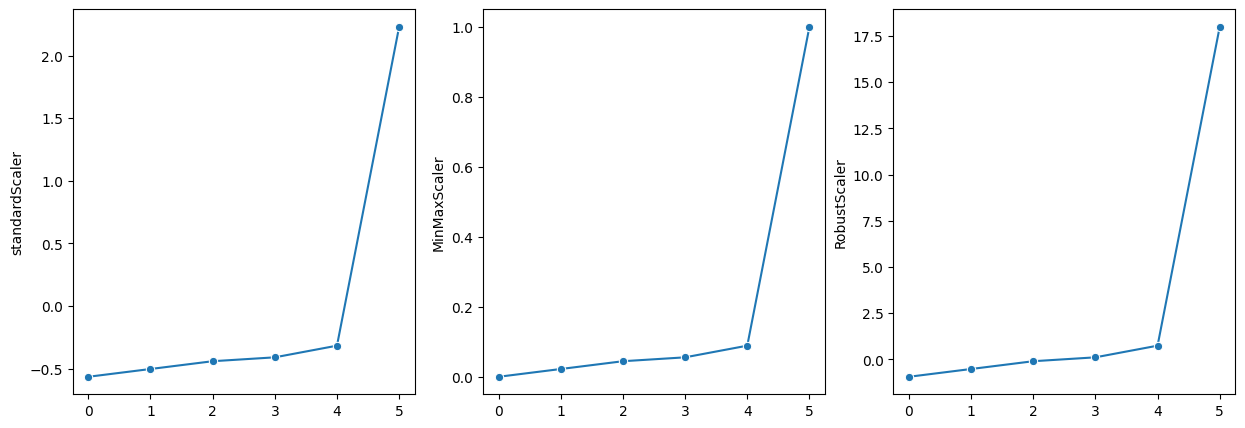

In [39]:
# 이상치가 있는 경우 Scaling 기법 비교

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df=pd.DataFrame([[10], [12], [14],[15],[18], [100]], columns=['Original'])

df['standardScaler']=std_sc.fit_transform(pd.DataFrame(df['Original']))
df['MinMaxScaler']=mm_sc.fit_transform(pd.DataFrame(df['Original']))
df['RobustScaler']=rb_sc.fit_transform(pd.DataFrame(df['Original']))
df
sns.lineplot(data=df['standardScaler'], ax=ax[0], marker='o')
sns.lineplot(data=df['MinMaxScaler'], ax=ax[1], marker='o')
sns.lineplot(data=df['RobustScaler'], ax=ax[2], marker='o')
plt.show()
# 그래프 모양은 비슷. 단, y범위 다름
# MinMaxScaler는 무조건 최소0, 최대1이므로 아무리 큰 이상치여도 1을 가짐.

In [62]:
# 타이타닉 생존율 예측에 필요한 전처리 수행(실습)

# 전처리 -> 함수로 수행할 것! 메인 코드셀에선 호출만 할 것!

def fillna(df):
    # 결측치 처리 함수
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df


def drop_feature(df):
    # 필요없는 칼럼 제거 함수
    df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
    return df

def encode_feature(df):
    # 라벨 인코딩 함수
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    
    df['Sex'] = encoder.fit_transform(df['Sex'])
    df['Cabin'] = encoder.fit_transform(df['Cabin'])
    df['Embarked'] = encoder.fit_transform(df['Embarked'])
    
    return df


def scaling_feature(train_data, test_data):
    # 특성 스케일링
    from sklearn.preprocessing import RobustScaler
    rb_sc = RobustScaler()

    rb_sc.fit(train_data)
    train_scaled = rb_sc.transform(train_data)
    test_scaled = rb_sc.transform(test_data)
    
    return train_scaled, test_scaled




In [72]:
# 데이터 로드
ta = pd.read_csv('./data/titanic.csv')


ta = fillna(ta)
print('NaN 처리:\n', ta.head(2))

ta = drop_feature(ta)
print('필요 없는 칼럼 제거:\n', ta.head(2))

ta= encode_feature(ta)
print('라벨인코딩:\n', ta.head(2))

# input, label 데이터 분리
X = ta.iloc[:, 1:]
y = ta.iloc[:, 0].to_numpy()

# 훈련-검사 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(X, y, random_state=10)


# 특성 스케일링
train_scaled, test_scaled = scaling_feature(train_input, test_input)
print('특성 스케일링\n', train_scaled[:3])

# LogisticRegression 훈련 -> 회귀지만 범주형 회귀임. 생존 여부를 분류하는 문제라...
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_scaled, train_label)


# 평가
lr.score(test_scaled, test_label)


NaN 처리:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500     N        S  
1      0   PC 17599  71.2833   C85        C  
필요 없는 칼럼 제거:
    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     N        S
1         1       1  female  38.0      1      0  71.2833   C85        C
라벨인코딩:
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  22.0      1      0   7.2500    146         3
1         1       1    0  38.0      1      0  71.2833     81         0
특성 스케일링
 [[ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  1

0.8295964125560538